In [1]:
import random
n=7
V = [(random.uniform(5,75),random.uniform(5,55)) for i in range(n)]
import matplotlib.pyplot as plt
alpha=2

In [2]:
V=[(59.60230863891071, 44.84521093306686),
 (15.957642824352993, 5.584901238283781),
 (15.92129440962412, 52.79258871267679),
 (21.137558934740103, 25.886845591574666),
 (49.267143783148356, 51.655431819995705),
 (10.85424385943711, 31.490148063297152)]

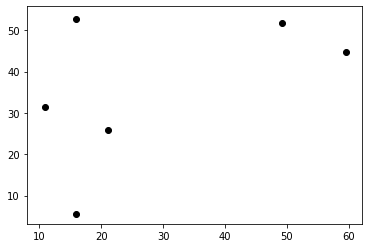

In [3]:
import matplotlib.pyplot as plt
for i in range(len(V)):
    plt.scatter(V[i][0],V[i][1],c='k')
plt.show()

In [4]:
def t_cost(s,t): return ((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5)
def d_cost(s,t): return (1/alpha)*(((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5))

In [5]:
#First Pass
import itertools
n=len(V)
Dt={}
truck={}
for i in range(1,n+1):
    for a in itertools.combinations(range(n),i):
        S=frozenset(a)
        for v in range(n):#始点
            for w in S:#終点
                Dt[(S,v,w)]=float('inf')#無限大に初期化
for i in range(1,n+1):
    for a in itertools.combinations(range(n),i):
        S=frozenset(a)
        for v in range(n):
            for w in S:
                if i==1:
                    Dt[(S,v,w)]=t_cost(V[v],V[w])
                    truck[(S,v,w)]=[w]
                else:
                    Sw=S-set([w])
                    for u in Sw:
                        z=Dt[(Sw,v,u)]+t_cost(V[u],V[w])
                        p=truck[(Sw,v,u)]+[w]
                        if z<Dt[(S,v,w)]:
                            Dt[(S,v,w)]=z
                            truck[(S,v,w)]=p


                            

In [6]:
#Second Pass
import itertools
n=len(V)
Dop={}
operation={}
for i in range(1,n+1):
    for a in itertools.combinations(range(n),i):
        S=frozenset(a)
        for v in range(n):#始点
            for w in S:#終点
                Dop[(S,v,w)]=Dt[(S,v,w)]#初期値
                
for i in range(1,n+1):
    for a in itertools.combinations(range(n),i):
        S=frozenset(a)
        for v in range(n):
            for w in S:
                if i==1:
                    Dop[(S,v,w)]=Dt[(S,v,w)]
                    operation[(S,v,w)]=truck[(S,v,w)]
                else:
                    Svw=S-set([v])-set([w])
                    for d in Svw:
                        drone_cost=d_cost(V[v],V[d])+d_cost(V[d],V[w])
                        Sd=S-set([d])
                        z=max(drone_cost,Dt[(Sd,v,w)])
                        if z<Dop[(S,v,w)]:
                            Dop[(S,v,w)]=z
                            operation[(S,v,w)]=truck[(Sd,v,w)]+[[d]]
                 

                
                    
                        
                                

    #Dop(S,v,w)とはv\inS,w\inSでありvからスタートしてSの全ての点を通ってwで終わることを表す

In [7]:
#改良版　入力が点集合のみ
import matplotlib.pyplot as plt
def Dynamic(V):
    n=len(V)
    D={}
    route={}
    D_result=[]
    route_result=[]
    for v0 in range(n):    
        for i in range(1,n+1):
            for a in itertools.combinations(range(n),i):
                S=frozenset(a)
                for w in S:
                    D[(S,w)]=float('inf')#Sにスタートノードは含めない
                    route.clear()
        for i in range(n):
            D[(frozenset({i}),i)]=Dop[(frozenset({i}),v0,i)]
            route[(frozenset({i}),i)]=[operation[(frozenset({i}),v0,i)]]    
        for i in range(1,n+1):
            for a in itertools.combinations(range(n),i):
                U=set(a)#Vの部分集合
                T=set(range(n))-U#T=V-U
                for j in range(1,len(T)+1):
                    for b in itertools.combinations(T,j):
                        Tset=set(b)#Tの部分集合
                        for u in U:
                            for w in range(n):
                                z=D[(frozenset(U),u)]+Dop[(frozenset(Tset|{w}),u,w)]
                                p=route[(frozenset(U),u)]+[operation[(frozenset(Tset|{w}),u,w)]]
                                if z<D[(frozenset(U|Tset|{u,w}),w)]:
                                    D[(frozenset(U|Tset|{u,w}),w)]=z
                                    route[(frozenset(U|Tset|{u,w}),w)]=p
                                
        D_result.append(D[(frozenset(range(n)),v0)])
        route_result.append(route[(frozenset(range(n)),v0)])
    
    x=D_result.index(min(D_result))#最小値は重複を許しているので別のルートの可能性も考えられる
    path=route_result[x]    
    for i in range(n):
        plt.scatter(V[v0][0],V[v0][1],c='red')
        plt.scatter(V[i][0],V[i][1],c='k')
    for i in range(len(path)):
        if len(path[i])>=3:
            for j in range(len(path[i])-2):
                truck_x=[V[path[i][j]][0],V[path[i][j+1]][0]]
                truck_y=[V[path[i][j]][1],V[path[i][j+1]][1]]
                plt.plot(truck_x, truck_y,c='red')
            truck_x=[V[path[i][-2]][0],V[path[(i+1)%len(path)][0]][0]]
            truck_y=[V[path[i][-2]][1],V[path[(i+1)%len(path)][0]][1]]
            drone_x1=[V[path[i][0]][0],V[path[i][-1][0]][0]]
            drone_y1=[V[path[i][0]][1],V[path[i][-1][0]][1]]
            drone_x2=[V[path[i][-1][0]][0],V[path[i][-2]][0]]
            drone_y2=[V[path[i][-1][0]][1],V[path[i][-2]][1]]
            plt.plot(truck_x,truck_y,c='red')
            plt.plot(drone_x1,drone_y1, c='blue')
            plt.plot(drone_x2,drone_y2, c='blue')
        elif len(path[i])==1:
            truck_x=[V[path[i][0]][0],V[path[i+1][0]][0]]
            truck_y=[V[path[i][0]][1],V[path[i+1][0]][1]]
            plt.plot(truck_x,truck_y, c='red')
        else:
            truck_x=[V[path[i][-2]][0],V[path[(i+1)%len(path)][0]][0]]
            truck_y=[V[path[i][-2]][1],V[path[(i+1)%len(path)][0]][1]]
            if len(path[i-1])==1:
                drone_x1=[V[path[i-1][0]][0],V[path[i][-1][0]][0]]
                drone_y1=[V[path[i-1][0]][1],V[path[i][-1][0]][1]]
            else:
                drone_x1=[V[path[i-1][-2]][0],V[path[i][-1][0]][0]]
                drone_y1=[V[path[i-1][-2]][1],V[path[i][-1][0]][1]]
            drone_x2=[V[path[i][-1][0]][0],V[path[i][-2]][0]]
            drone_y2=[V[path[i][-1][0]][1],V[path[i][-2]][1]]
            plt.plot(truck_x,truck_y,c='red')
            plt.plot(drone_x1,drone_y1, c='blue')
            plt.plot(drone_x2,drone_y2, c='blue')
    
    
    return path,min(D_result),len(path)

([[3], [1, 5, [0]], [2, 3, [4]]], 96.6589937202063, 3)

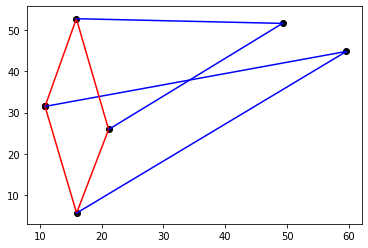

In [8]:
Dynamic(V)